# Cocktail Party Problem 

Задача формулируется следующим образом:
Допустим, у вас есть сетка с фиксированным количеством ячеек, к примеру, NxN. Помимо этого, у вас есть символы из определенного алфавита. Эти символы могут быть записаны на сетке, используя ячейки как пиксели. Вашими наблюдениями являются несколько символов, написанных друг на друге. Как разделить источники?

Эту задачу можно проклассифицировать как задачу из семейства Blind Signal (Source) Separation. Классическим алгоритмом для ее решения является Independent component analysis (ICA).

Давайте попробуем применить этот алгоритм к данной задаче и посмотрим, как он работает. 

Подключим все необходимые библиотеки:

In [638]:
%matplotlib inline
import sklearn
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

Скачаем классический набор данных для распознавания рукописного ввода (MNIST) и будем использовать картинки из этого корпуса как входные данные

In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="/tmp/")

In [381]:
# Служебная функция для отрисовки картинки 28x28 по массиву данных
def show_pictures(*pixels_arrays):
    pictures_number = len(pixels_arrays)
    fig, axes = plt.subplots(1, pictures_number, squeeze=False, figsize=(15,15))
    for i, pixels_array in enumerate(pixels_arrays):
        image_pixels = []
        normalize = np.max(pixels_array)
        for x in pixels_array:
            x = x / float(normalize)
            image_pixels.extend([x, x, x])
        image_pixels = np.array(image_pixels).reshape((28, 28, 3))
        axes[0][i].set_axis_off()
        axes[0][i].imshow(image_pixels)
    plt.axis('off')

Загрузим в массив `data` `N` картинок размером 28*28 пикселей.

In [550]:
pics = [1, 5, 4]
samples_number = mnist.data.shape[0]
data = np.array([mnist.data[i * samples_number/10 + random.randint(0, 1000)] for i in pics])


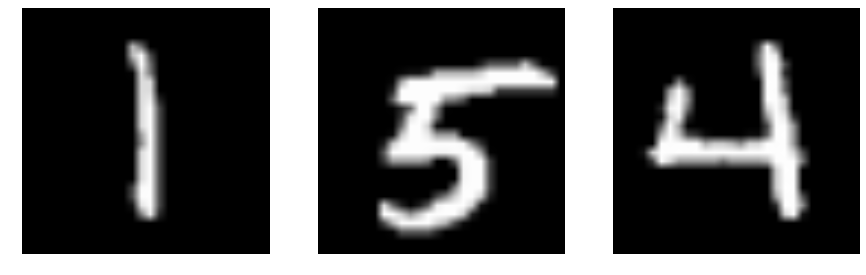

In [551]:
# Взглянем на картинки, которые мы загрузили
show_pictures(*data)

In [552]:
# Эта функция смешивает картинки
def mix_pictures(pictures, mix_matrix):
    return pictures.T.dot(mix_matrix.T).T

In [561]:
# Расчитаем наши наблюдения
mix_matrix = np.array(np.random.random((len(data), len(data)))).astype("float")
observations = mix_pictures(data, mix_matrix)

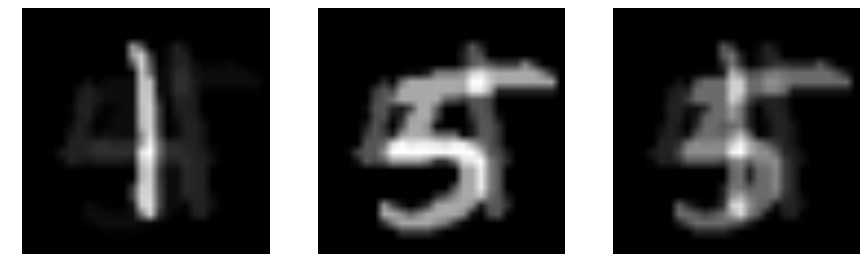

In [562]:
show_pictures(*observations)

In [646]:

def sigmoid(x): return 1 / (1 + np.exp(-x))

def sigmoid_der(x): return sigmoid(x) * (1 - sigmoid(x))

def log_likelihood(W, observations):
    x = observations
    
    return np.sum(
        [
            np.sum(
                [
                    np.log(sigmoid_der(w_j.dot(x_i))) for w_j in W
                ]
            ) + np.log(np.linalg.det(W))
            for x_i in x
        ]
    ) 
     

def ICA(n, observations):
    from sklearn.decomposition import FastICA as _ica
    observations_x = (observations - np.mean(observations.T, axis=1)).T / np.max(observations)
    learning_rate = 10E-3
    max_iterations = 10
    W = np.random.random((n, n))
    cur_likehood = log_likelihood(W, observations_x)
    while _ in range(max_iterations):
        for x_i in observations_x:
            W += learning_rate * np.array(
                [1 - 2 * sigmoid(w_i.dot(x_i)) for w_i in W.T]
            ).dot(x_i) + np.linalg.inv(W.T)
        cur_likehood = log_likelihood(W, observations_x)
    #return W.dot(observations)
    return _ica(n_components=len(data)).fit_transform(observations.T)

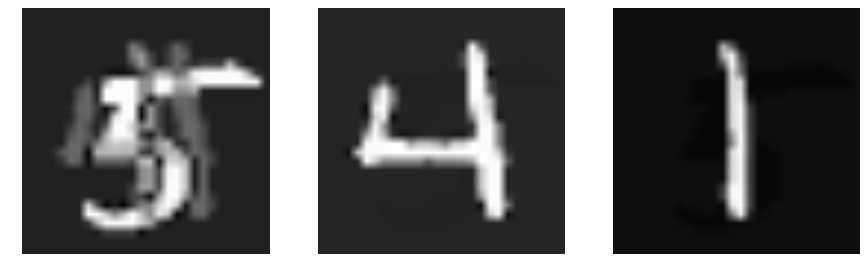

In [647]:
signals = ICA(len(data), observations)
show_pictures(*np.abs(signals.T))

In [573]:
# функция для бинаризации пикселей
def binarize(signals):
    return np.apply_along_axis(
        lambda x: np.array([1 if xx > (max(x) / 2) else 0 for xx in x]),
        1,
        np.abs(signals.T)
    )

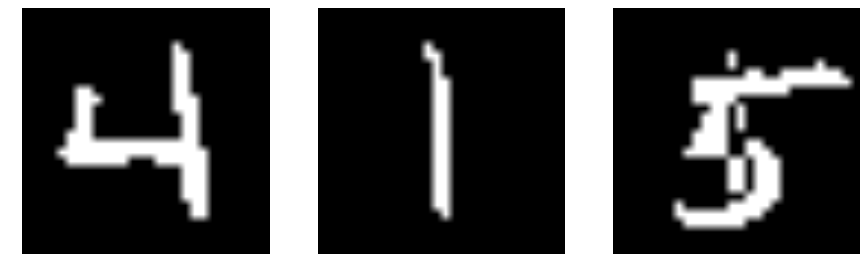

In [574]:
show_pictures(*binarize(signals))

In [204]:
#служебные функции: посмотреть как на сигнал.
colors = ['red', 'steelblue', 'orange']
def plot_as_signal(data):
    for sig, color in zip(data, colors):
        plt.plot(sig, color=color)

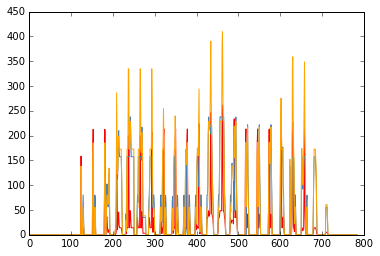

In [635]:
plot_as_signal(observations)